In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn import preprocessing
import lightgbm as lgb


# Importing the dataset
dataset = pd.read_csv('C:\Fires\FullDatasetNoArson.csv')
vals = dataset.values
dataset

,LATITUDE,LONGITUDE,Tair_f,Tair_f_min,Tair_f_max,Wind_f,DOY,Humidity,IS_FIRE
0,35.328300,-81.298300,301.011658,296.969971,305.139984,3.524399,196,66.113370,1
1,31.235677,-83.189962,298.996216,292.919952,305.259979,3.973767,130,76.558493,0
2,40.631698,-73.979177,287.530273,283.350006,291.850006,6.047822,269,75.278075,1
3,36.959821,-120.004716,295.564514,290.779999,301.229919,2.549353,300,50.633093,0
4,28.800266,-81.109666,286.402618,280.850006,293.649963,1.676487,15,71.520750,0
...,...,...,...,...,...,...,...,...,...
1316901,43.163514,-77.600365,271.197784,268.819946,274.290070,2.986924,67,85.860195,0
1316902,35.299137,-81.440245,284.577240,279.660004,289.714996,4.441151,139,62.376975,0
1316903,32.406323,-82.507696,273.162872,268.120026,281.249969,3.271527,20,65.663317,0
1316904,35.261958,-111.503799,289.208588,283.189972,295.069977,5.624324,162,28.091490,0


In [71]:
x = dataset.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(x)
x_scaled = min_max_scaler.transform(x)
dataset = pd.DataFrame(x_scaled)
min_max_scaler.data_min_

array([ 2.53750631e+01, -1.24249910e+02,  2.39104691e+02,  2.35140045e+02,
        2.44490036e+02,  1.74928576e-01,  1.00000000e+00,  3.09474834e+00,
        0.00000000e+00])

In [72]:
vals = dataset.values
X = dataset.iloc[:, 0:8].values
y = dataset.iloc[:, 8].values
X.shape

(1316906, 8)

In [74]:
X

array([[0.42354313, 0.8319953 , 0.81525888, ..., 0.16962172, 0.53424658,
        0.59222189],
       [0.24938848, 0.7953528 , 0.78871733, ..., 0.19237833, 0.35342466,
        0.69038066],
       [0.64922025, 0.97377056, 0.63772122, ..., 0.29741132, 0.73424658,
        0.67834785],
       ...,
       [0.29920335, 0.80856866, 0.44851551, ..., 0.15681598, 0.05205479,
        0.58799249],
       [0.42072005, 0.24689888, 0.6598231 , ..., 0.2759648 , 0.44109589,
        0.23490862],
       [0.44224893, 0.56838655, 0.59527411, ..., 0.18486332, 0.26027397,
        0.58713143]])

In [49]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [50]:
import lightgbm as lgb
d_train = lgb.Dataset(x_train, label=y_train)
params = {}
learning_rate = 0.05227
boosting_type = 'gbdt'
objective = 'binary'
metric = 'auc'
sub_feature = 0.5721
num_leaves = 636
min_data = 357
max_depth = 12
max_bin = 451

params['learning_rate'] = learning_rate
params['boosting_type'] = boosting_type
params['objective'] = objective
params['metric'] = metric
params['sub_feature'] = sub_feature
params['num_leaves'] = num_leaves
params['min_data'] = min_data
params['max_depth'] = max_depth
params['max_bin'] = max_bin

clf = lgb.train(params, d_train, 2000)

In [51]:
#Prediction
#clf = lgb.Booster(model_file='lgb-model_0.8017112812740146.txt')
y_pred=clf.predict(x_test)
#convert into binary values
for i in range(0,len(y_pred)):
    if y_pred[i]>=.5:       # setting threshold to .5
        y_pred[i]=1
    else:  
        y_pred[i]=0
y_pred


#Prediction
#clf = lgb.Booster(model_file='lgb-model_0.8017112812740146.txt')
y_pred=clf.predict(x_test)
#convert into binary values
k = 0
for i in range(0,len(y_pred)):
    if y_pred[i]>=.5:       # setting threshold to .5
        y_pred[i]=1
    elif y_pred[i]<0:       # setting threshold to .5
        y_pred[i]=0
        print ("fuck me " + str(k) +" times")
        k= k + 1
    else:  
        y_pred[i]=0
y_pred

array([0., 0., 0., ..., 1., 1., 0.])

In [52]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

#Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred,y_test)
cm

array([[234982,  12636],
       [ 55372,  26237]], dtype=int64)

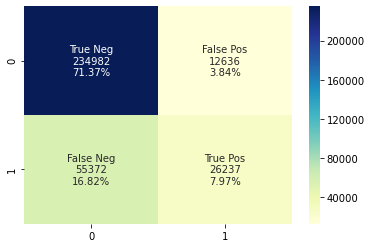

In [53]:
import matplotlib.pyplot as plt  # doctest: +SKIP
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import seaborn as sns

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='YlGnBu')


In [54]:
accuracy

0.7934312799375507

In [55]:
all = len(y_test)
clf.save_model('extra1percentModel.txt')
dataOfML = {'learning_rate':  [learning_rate],
            'boosting_type': [boosting_type],
            'objective': [objective],
            'metric': [metric],
            'sub_feature': [sub_feature],
            'num_leaves': [num_leaves],
            'min_data': [min_data],
            'max_depth': [max_depth],
            'True Negative': [cm[0,0]/all],
            'True Positive': [cm[1,1]/all],
            'False Negative':[cm[1,0]/all],
            'False Positive': [cm[0,1]/all],
            'accuracy': [accuracy]
        }

MLdf = pd.DataFrame (dataOfML, columns = ['learning_rate','boosting_type','objective','metric','sub_feature','num_leaves','min_data','max_depth','True Negative','True Positive','False Negative','False Positive','accuracy'])

MLdf.to_csv('C:/Fires/MLDocumentation.csv',mode ='a',index=False)

In [56]:
TPR = cm[1,1] / (cm[1,1] + cm[1,0])
TPR

0.3214964035829382

In [57]:
TNR = cm[0,0] / (cm[0,0] + cm[0,1])
TNR

0.9489697841029328

In [58]:
BA = (TNR +TPR) / 2
BA


0.6352330938429355

In [59]:
clf.predict([[35.3283, -81.2983, 301.0117, 296.97, 305.14, 3.524399, 196, 66.11337]])

array([0.00426059])

In [66]:
x_scaled = min_max_scaler.transform([[35.3283, -81.2983, 301.0117, 296.97, 305.14, 3.524399, 196, 66.11337,1]])
clf.predict(x_scaled[:, 0:8])

array([0.06004378])

In [ ]:
clf = lgb.Booster(model_file='lgb-model_0.7958551394630452.txt')